## Clase 03/23/2025
## Representación númerica
Como un computadora almacena y maneja número utilizando bits (0 y 1)

In [ ]:

def binary_enteros(numero):
    parte_entera = ""
    numero =int(numero)

    if numero == 0:
        return "0"
    
    while numero > 0:
        residuo = numero % 2
        parte_entera = str(residuo) + parte_entera
        numero = numero // 2
    return parte_entera

def binary_decimal(numero):
    parte_decimal = ""
    numero =  numero - int(numero)

    contador = 0

    while numero > 0 and contador < 60:
        numero *=2
        bit = int(numero)
        parte_decimal = parte_decimal + str(bit)
        numero -= bit
        if abs(numero) <1e-10:
            break
        contador += 1
    return parte_decimal

def transformacion_32(numero):
    signo = 0 if numero >= 0 else 1
    numero = abs(numero)

    parte_entera_bin = binary_enteros(numero)
    parte_decimal_bin = binary_decimal(numero)

    if parte_entera_bin =="0":

        normalizado =parte_decimal_bin.lstrip("0")
        exponente = -len(parte_decimal_bin) + len(normalizado)
    else:
       
        normalizado = parte_entera_bin + parte_decimal_bin
        exponente = len(parte_entera_bin)- 1

   
    sesgo = 127
    exponente_bin = binary_enteros(exponente + sesgo)

    
    mantisa = normalizado[1:24] if len(normalizado)> 1 else "0" * 23
    mantisa = mantisa.ljust(23, "0")

    return f"{signo} {exponente_bin.zfill(8)} {mantisa}"


def transformacion_64(numero):
    signo = 0 if numero >= 0 else 1
    numero = abs(numero)

    parte_entera_bin = binary_enteros(numero)
    parte_decimal_bin = binary_decimal(numero)

    if parte_entera_bin == "0":
    
        normalizado = parte_decimal_bin.lstrip("0")
        exponente = -len(parte_decimal_bin) + len(normalizado)
    else:
       
        normalizado = parte_entera_bin + parte_decimal_bin
        exponente = len(parte_entera_bin)- 1

  
    sesgo = 1023
    exponente_bin = binary_enteros(exponente + sesgo)

    mantisa = normalizado[1:53] if len(normalizado) > 1 else "0" * 52
    mantisa = mantisa.ljust(52, "0")

    return f"{signo} {exponente_bin.zfill(11)} {mantisa}"

print("Transformación IEEE 754")
num_console = float(input("Ingrese un número: "))

        
transformacion_32 = transformacion_32(num_console)
transformacion_64= transformacion_64(num_console)

print(f"Representación IEEE 754 de 32 bits: {transformacion_32}")
print(f"Representación IEEE 754 de 64 bits: {transformacion_64}")





## Aritmética de dígitos finitos de computador
$$
\pm 0.d_1d_2 \dots d_k \times 10^n
$$


### Operaciones
Abajo de cada operación estará un ejemplo, suponiendo que **X = 5/7** y **Y = 0.714251**, y usamos redondeo a 5 cifras significativas.

**1**. Suma
$$
 x \oplus y = f_l(f_l(x) + f_l(y)) 
$$



In [ ]:
x = 0.71429
y = 0.71425
resultado = x + y

def represenacion_punto_flotante(numero):
    
    signo = "-" if numero < 0 else ""
    numero = abs(numero)

    exponente =0
    if numero != 0:
        while numero >=1:
            numero /= 10
            exponente += 1
        while numero < 0.1:
            numero *= 10
            exponente -= 1



    mantisa = f"{numero:.1f}".lstrip("0")
    return f"{signo}0{mantisa} * 10^{exponente}"

resultado_punto_flotante = represenacion_punto_flotante(resultado)

print(f"Suma: {resultado}")
print(f"Resultado en punto flotante: {resultado_punto_flotante}")

**2**. Resta
$$
 x \ominus y = f_l(f_l(x) - f_l(y)) 
$$


In [ ]:
x = 0.71429
y = 0.71425
resultado = x - y

def represenacion_punto_flotante(numero):
    
    signo = "-" if numero < 0 else ""
    numero = abs(numero)

    exponente =0
    if numero != 0:
        while numero >=1:
            numero /= 10
            exponente += 1
        while numero < 0.1:
            numero *= 10
            exponente -= 1



    mantisa = f"{numero:.1f}".lstrip("0")
    return f"{signo}0{mantisa} * 10^{exponente}"

resultado_punto_flotante = represenacion_punto_flotante(resultado)

print(f"Resta: {resultado}")
print(f"Resultado en punto flotante: {resultado_punto_flotante}")

**3**. Multiplicación
$$
x \otimes y = f_l(f_l(x) * f_l(y)) 
$$



In [ ]:
x = 0.71429
y = 0.71425
resultado = x * y

def represenacion_punto_flotante(numero):
    
    signo = "-" if numero < 0 else ""
    numero = abs(numero)

    exponente =0
    if numero != 0:
        while numero >=1:
            numero /= 10
            exponente += 1
        while numero < 0.1:
            numero *= 10
            exponente -= 1



    mantisa = f"{numero:.1f}".lstrip("0")
    return f"{signo}0{mantisa} * 10^{exponente}"

resultado_punto_flotante = represenacion_punto_flotante(resultado)

print(f"Multiplicación: {resultado}")
print(f"Resultado en punto flotante: {resultado_punto_flotante}")

**4** División
$$
x \oslash y = f_l\left(\frac{f_l(x)} {f_l(y)}\right)  

In [ ]:
x = 0.71429
y = 0.71425
resultado = x / y

def represenacion_punto_flotante(numero):
    
    signo = "-" if numero < 0 else ""
    numero = abs(numero)

    exponente =0
    if numero != 0:
        while numero >=1:
            numero /= 10
            exponente += 1
        while numero < 0.1:
            numero *= 10
            exponente -= 1



    mantisa = f"{numero:.1f}".lstrip("0")
    return f"{signo}0{mantisa} * 10^{exponente}"

resultado_punto_flotante = represenacion_punto_flotante(resultado)

print(f"División: {resultado}")
print(f"Resultado en punto flotante: {resultado_punto_flotante}")

## Convergencia, Divergencia y Tolerancia
### 1. Convergencia
Converge si, al aumentar el número de iteraciones, los resultados se acercan cada vez más a la solución exacta.

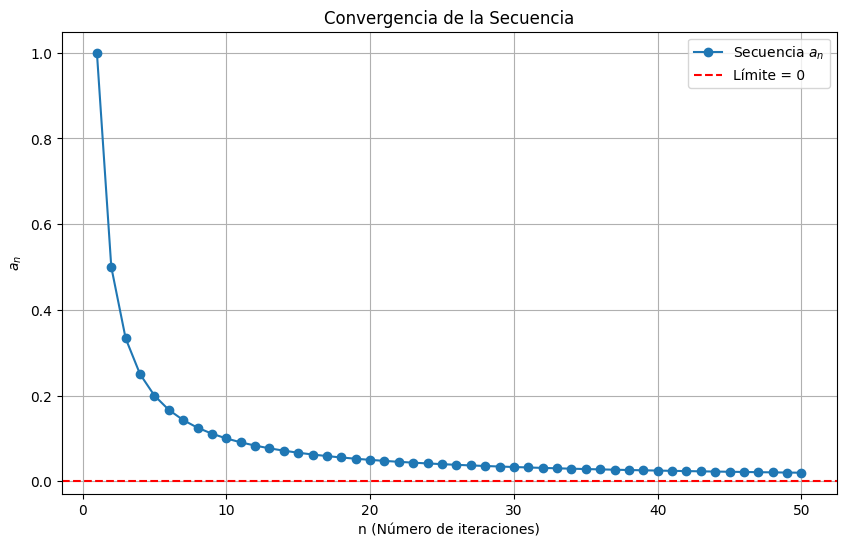

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def generar_secuencia(num_max):
    secuencia = [1/i for i in range(1, num_max +1)]
    return secuencia

def graficar_secuencia(secuencia, limite):
    n = np.arange(1, len(secuencia) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(n, secuencia, label="Secuencia $a_n$", marker="o", linestyle="-")
    plt.axhline(y=limite, color="r", linestyle="--", label=f"Límite = {limite}")
    plt.title("Convergencia de la Secuencia")
    plt.xlabel("n (Número de iteraciones)")
    plt.ylabel("$a_n$")
    plt.legend()
    plt.grid()
    plt.show()

num_max = 50
limite = 0
secuencia = generar_secuencia(num_max)
graficar_secuencia(secuencia, limite)




## Divergencia
Si los resultados se alejas indenifidamente o no se estabilizam.

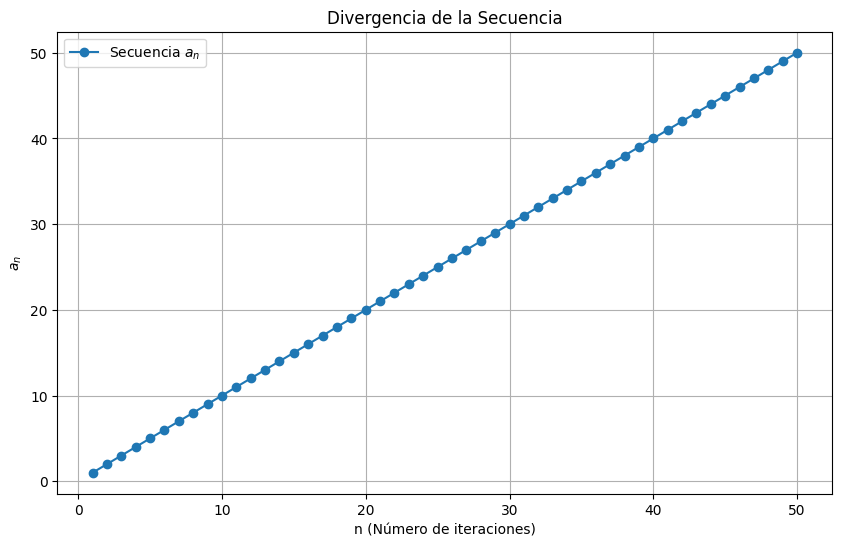

In [24]:
import matplotlib.pyplot as plt
import numpy as np

def generar_secuencia_divergente(num_max):
    secuencia = [ n for n in range(1, num_max +1)]
    return secuencia

def graficar_divergencia(secuencia):
    n = np.arange(1, len(secuencia) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(n, secuencia, label="Secuencia $a_n$", marker="o", linestyle="-")
    plt.title("Divergencia de la Secuencia")
    plt.xlabel("n (Número de iteraciones)")
    plt.ylabel("$a_n$")
    plt.legend()
    plt.grid()
    plt.show()

num_max = 50
secuencia = generar_secuencia_divergente(num_max)
graficar_divergencia(secuencia)

## Tolerancia
Es el limite aceptable de error.

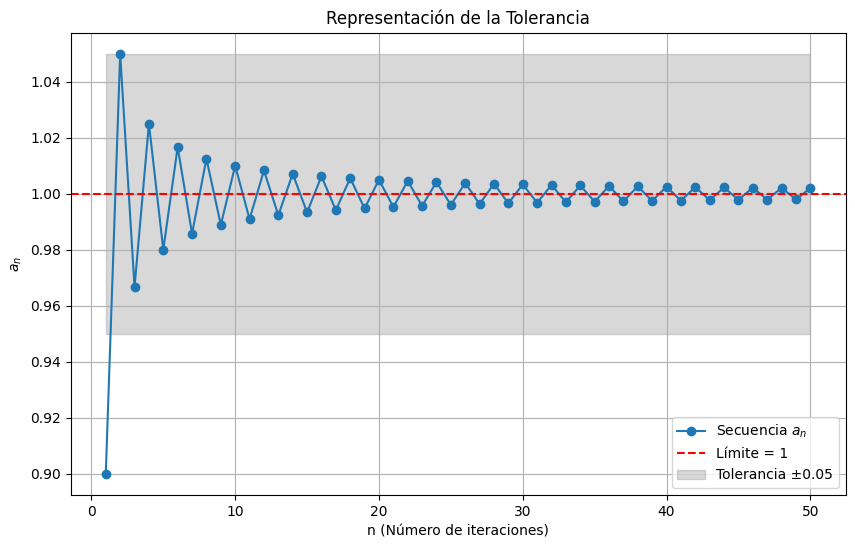

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def generar_secuencia_tolerancia(num_max):
    limite = 1
    secuencia = [limite + (-1)**n *0.1/ n for n in range(1, num_max +1)]
    return secuencia, limite

def graficar_tolerancia(secuancia, limite,tolerancia):
    n = np.arange(1, len(secuencia) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(n, secuencia, label="Secuencia $a_n$", marker="o", linestyle="-")
    plt.axhline(y=limite, color="r", linestyle="--", label=f"Límite = {limite}")
    plt.fill_between(n, limite - tolerancia, limite + tolerancia, color="gray", alpha=0.3, label=f"Tolerancia ±{tolerancia}")
    plt.title("Representación de la Tolerancia")
    plt.xlabel("n (Número de iteraciones)")
    plt.ylabel("$a_n$")
    plt.legend()
    plt.grid()
    plt.show()

num_max = 50    
tolerancia = 0.05

secuencia, limite = generar_secuencia_tolerancia(num_max)
graficar_tolerancia(secuencia, limite, tolerancia)

## Criterios de parada
Se usa dentro de los algoritmos para evitar lazos infinitos

### Criterio de parada: Error absoluto

El criterio de parada basado en el error absoluto se define como:

$$
|P_n - P_{n-1}| < \varepsilon
$$

Donde:

- $P_n$: Es la aproximación actual.
- $P_{n-1}$: Es la aproximación anterior.
- $\varepsilon$: Es la tolerancia o el error absoluto aceptable.

El algoritmo se detendrá cuando la diferencia absoluta entre dos iteraciones consecutivas sea menor que $\varepsilon$.

In [21]:
def parada_absoluto(tolerancia):
    valor_inicial = 1.0
    iteracion = 0

    while True:
        valor_actual = valor_inicial /2
        error_absoluto = abs(valor_actual - valor_inicial)

        print(f"Iteracion {iteracion}: P_n = {valor_actual:.8f}, Error Absoluto = {error_absoluto:.8f}")

        if error_absoluto < tolerancia:
            print(f"Criterio de parada alcanzado en la iteracipn {iteracion}.")
            break
        valor_inicial = valor_actual
        iteracion += 1

tolerancia = 0.01

parada_absoluto(tolerancia)

Iteracion 0: P_n = 0.50000000, Error Absoluto = 0.50000000
Iteracion 1: P_n = 0.25000000, Error Absoluto = 0.25000000
Iteracion 2: P_n = 0.12500000, Error Absoluto = 0.12500000
Iteracion 3: P_n = 0.06250000, Error Absoluto = 0.06250000
Iteracion 4: P_n = 0.03125000, Error Absoluto = 0.03125000
Iteracion 5: P_n = 0.01562500, Error Absoluto = 0.01562500
Iteracion 6: P_n = 0.00781250, Error Absoluto = 0.00781250
Criterio de parada alcanzado en la iteracipn 6.


### Criterio de parada: Error relativo

El criterio de parada basado en el error relativo se define como:

$$
 \frac{|P_n - P_{n-1}|}{|P_n|} < \varepsilon  \quad P_n \neq 0
$$



In [22]:
def parada_relativo(tolerancia):
    valor_inicial = 1.0
    iteracion = 1

    while True:
        valor_actual = valor_inicial /2
        error_absoluto = abs((valor_actual - valor_inicial) / valor_actual) if valor_actual != 0 else float('inf')

        print(f"Iteracion {iteracion}: P_n = {valor_actual:.8f}, Error Absoluto = {error_absoluto:.8f}")

        if error_absoluto < tolerancia:
            print(f"Criterio de parada alcanzado en la iteracipn {iteracion}.")
            break
        valor_inicial = valor_actual
        iteracion += 1

tolerancia = 0.01

parada_absoluto(tolerancia)

Iteracion 0: P_n = 0.50000000, Error Absoluto = 0.50000000
Iteracion 1: P_n = 0.25000000, Error Absoluto = 0.25000000
Iteracion 2: P_n = 0.12500000, Error Absoluto = 0.12500000
Iteracion 3: P_n = 0.06250000, Error Absoluto = 0.06250000
Iteracion 4: P_n = 0.03125000, Error Absoluto = 0.03125000
Iteracion 5: P_n = 0.01562500, Error Absoluto = 0.01562500
Iteracion 6: P_n = 0.00781250, Error Absoluto = 0.00781250
Criterio de parada alcanzado en la iteracipn 6.


### Criterio de parada: Valor de la función

El criterio de parada basado en el valor de la función se define como:

$$
|f(P_{n-1}) | < \varepsilon
$$



In [ ]:
def criterio_valor_funcion(tolerancia):
    def funcion(x):
        return x**2 - 2  

    def derivada_funcion(x):
        return 2 * x  

    valor_actual = 1.0  
    iteracion = 1

    while True:
        valor_funcion = abs(funcion(valor_actual))  

        print(f"Iteración {iteracion}: P_n = {valor_actual:.8f}, |f(P_n)| = {valor_funcion:.8f}")

        if valor_funcion < tolerancia:  
            print(f"Criterio de parada alcanzado en la iteración {iteracion}")
            break

        valor_actual = valor_actual - funcion(valor_actual) / derivada_funcion(valor_actual)
        iteracion += 1


tolerancia = 0.01  
criterio_valor_funcion(tolerancia)

Iteración 1: P_n = 1.00000000, |f(P_n)| = 1.00000000
Iteración 2: P_n = 1.50000000, |f(P_n)| = 0.25000000
Iteración 3: P_n = 1.41666667, |f(P_n)| = 0.00694444
Criterio de parada alcanzado en la iteración 3


### Criterio de parada: Número de iteraciones
$$
i < K

In [8]:
def parada_numero_iteraciones(max_iteraciones):
    valor_actual = 1.0
    iteracion = 0

    while iteracion <= max_iteraciones:
        print(f"itercion {iteracion}: P_n = {valor_actual:.8f}")
        valor_actual /=2
        iteracion +=1
    print(f"Criterio de parada alcanzado despies de {max_iteraciones} iteraciones.")

max_iteraciones = 5
parada_numero_iteraciones(max_iteraciones)


   

itercion 0: P_n = 1.00000000
itercion 1: P_n = 0.50000000
itercion 2: P_n = 0.25000000
itercion 3: P_n = 0.12500000
itercion 4: P_n = 0.06250000
itercion 5: P_n = 0.03125000
Criterio de parada alcanzado despies de 5 iteraciones.


### Criterio de parada: Tiempo
$$ t <T_{ms}

In [16]:
import time

def parada_tiempo(tiempo_max):
    valor_actual = 1.0
    iteracion =1
    tiempo_inicio = time.time()

    while True:
        tiempo_actual = time.time() - tiempo_inicio

        if tiempo_actual >= tiempo_max:
            print(f"Criterio de parada alcanzado: Tiempo maximo de {tiempo_maximo} segundos.")
            break
        print(f"iteracion {iteracion}: P_n = {valor_actual:.8f}, Tiempo transcurrido: {tiempo_actual:.2f} segundos")
        valor_actual = valor_actual /2
        iteracion+=1

tiempo_maximo=0.5

parada_tiempo(tiempo_maximo)

iteracion 1: P_n = 1.00000000, Tiempo transcurrido: 0.00 segundos
iteracion 2: P_n = 0.50000000, Tiempo transcurrido: 0.00 segundos
iteracion 3: P_n = 0.25000000, Tiempo transcurrido: 0.00 segundos
iteracion 4: P_n = 0.12500000, Tiempo transcurrido: 0.00 segundos
iteracion 5: P_n = 0.06250000, Tiempo transcurrido: 0.00 segundos
iteracion 6: P_n = 0.03125000, Tiempo transcurrido: 0.00 segundos
iteracion 7: P_n = 0.01562500, Tiempo transcurrido: 0.00 segundos
iteracion 8: P_n = 0.00781250, Tiempo transcurrido: 0.00 segundos
iteracion 9: P_n = 0.00390625, Tiempo transcurrido: 0.00 segundos
iteracion 10: P_n = 0.00195312, Tiempo transcurrido: 0.00 segundos
iteracion 11: P_n = 0.00097656, Tiempo transcurrido: 0.00 segundos
iteracion 12: P_n = 0.00048828, Tiempo transcurrido: 0.00 segundos
iteracion 13: P_n = 0.00024414, Tiempo transcurrido: 0.00 segundos
iteracion 14: P_n = 0.00012207, Tiempo transcurrido: 0.00 segundos
iteracion 15: P_n = 0.00006104, Tiempo transcurrido: 0.00 segundos
iter